# Analysis of portuguese students' habits that influence education

TITOLO SECONDARIO: ***How much should I study if I want to go to the bar?***
ahahaha

Michael Albarello - michael.albarello@studio.unibo.it - 0001058648

Matteo Nestola - matteo.nestola@studio.unibo.it - INSERIRE MATRICOLA MATT

In the following notebook, we will analize how students' extracurricular habits are capable to influence their school performance. <br>In particular, we selected the [Student Alcohol Consumption Dataset](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption), which includes grade, demographic, social and school related informations that have been collected by using school reports and questionnaires. 

The dataset includes two subsets regarding the students' performances in two distinct subjects: 
- Mathematics (mat) 
- Portuguese Language (por).

Here's some explanation for each column, provided by the dataset's creator:


|Columns||Description||Type|
|:----------||:--------------||:----|
|**school**||student's school||binary:<br>'GP' - Gabriel Pereira<br>'MS' - Mousinho da Silveira|
|**sex**||student's sex||binary:<br>'F' - female<br>'M' - male|
|**age**||student's age||numeric: <br> from 15 to 22|
|**address**||student's home address type||binary: <br> 'U' - urban <br> 'R' - rural|
|**famsize**||family size||binary: <br> 'LE3' - less or equal to 3 <br> 'GT3' - greater than 3|
|**Pstatus**||parent's cohabitation status||binary: <br> 'T' - living together <br> 'A' - apart|
|**Medu**||mother's education||numeric: <br> 0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education|
|**Fedu**||father's education||numeric: <br> 0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education|
|**Mjob**||mother's job||nominal: <br> 'teacher' <br> 'health' care related <br> civil 'services' (e.g. administrative or police) <br> 'at_home' <br> 'other'|
|**Fjob**||father's job||nominal: <br> 'teacher' <br> 'health' care related <br> civil 'services' (e.g. administrative or police) <br> 'at_home' <br> 'other'|
|**reason**||reason to choose this school||nominal: <br> close to 'home' <br> school 'reputation' <br> 'course' preference <br> 'other'|
|**guardian**||student's guardian||nominal: <br> 'mother <br> 'father' <br> 'other'|
|**traveltime**||home to school travel time||numeric: <br> 1 - <15 min. <br> 2 - 15 to 30 min. <br> 3 - 30 min. to 1 hour <br> or 4 - >1 hour|
|**studytime**||weekly study time||numeric: <br> 1 - <2 hours <br> 2 - 2 to 5 hours <br> 3 - 5 to 10 hours <br> or 4 - >10 hours|
|**failures**||number of past class failures||numeric: <br> n if 1<=n<3 <br> else 4|
|**schoolsup**||extra educational support||binary: <br> yes <br> no|
|**famsup**||family educational support||binary: <br> yes <br> no|
|**paid**||extra paid classes within the course subject (Math or Portuguese)||binary:<br> yes <br> no|
|**activities**||extra-curricular activities||binary: <br> yes <br> no|
|**nursery**||attended nursery school||binary: <br> yes <br> no|
|**higher**||wants to take higher education||binary: <br> yes <br> no|
|**internet**||Internet access at home||binary: <br> yes <br> no|
|**romantic**||with a romantic relationship||binary: <br> yes <br> no)|
|**famrel**||quality of family relationships||numeric: from 1 - very bad <br> to 5 - excellent|
|**freetime**||free time after school||numeric: <br> from 1 - very low <br> to 5 - very high|
|**goout**||going out with friends||numeric: <br> from 1 - very low <br> to 5 - very high|
|**Dalc**||workday alcohol consumption||numeric: <br> from 1 - very low <br> to 5 - very high|
|**Walc**||weekend alcohol consumption||numeric: <br> from 1 - very low <br> to 5 - very high|
|**health**||current health status||numeric: <br> from 1 - very bad <br> to 5 - very good|
|**absences**||number of school absences||numeric: <br> from 0 <br> to 93|



These grades are related with the course subject, Math or Portuguese:

|Grade|Description||Type|
|:------|:--------||:--------|
|G1|first period grade||numeric: <br>from 0 <br>to 20|
|G2 |second period grade||numeric: <br>from 0 <br>to 20|
|G3 |final grade (output target)||numeric: <br>from 0 <br>to 20)|


The goal of the following analysis is to obtain a better understanding on how do social environments affect the  curricular career of a generic student.

### Imports
Let's start by importing the needed libraries:

In [1]:
import os

#---Data representation---

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
%matplotlib inline

#---Pgmpy library---

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BayesianEstimator

#---Plot Bayesian Networks---

import daft
from daft import PGM

In [4]:
#paths to datasets:

abs_path = os.getcwd()

mat_path= f'{abs_path}/dataset/student_alcohol/student-mat.csv'
por_path= f'{abs_path}/dataset/student_alcohol/student-por.csv'

#import datasets:
df1 = pd.read_csv(mat_path, sep=",")
df2 = pd.read_csv(por_path, sep=",")

#concatenate subsets:
df = pd.concat([df1, df2])

In [49]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Data discretization and denoiseing

Discretization of age:

- 15-17	
- 18-19 
- 20-22 

In [15]:
print("Min age: ",np.min(df['age']),"\nMax age: " ,np.max(df['age']))

df_new['age']=pd.cut(x = df_new['age'], 
                     bins=[np.min(df_new['age']), 17, 19, np.max(df_new['age'])],   #definisco i bin (intervalli)
                     labels=["15-17","18-19", "20-22 "] ,include_lowest=True)   #include lowest, include gli estremi

NameError: name 'df' is not defined

In [6]:
df_new.head()

school sex    age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18-19       U     GT3       A     4     4  at_home   teacher   
1     GP   F  15-17       U     GT3       T     1     1  at_home     other   
2     GP   F  15-17       U     LE3       T     1     1  at_home     other   
3     GP   F  15-17       U     GT3       T     4     2   health  services   
4     GP   F  15-17       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

In [5]:
df_new[df_new["age"] == "20-22"]

NameError: name 'df_new' is not defined

We can consider only G3 as output beacause G1 and G2 are intermediate evaluations
Removing intermediate evaluation G1 and G2

In [7]:
df_new = df_new.drop(['G1','G2',], axis=1)

Removing some redundant features

In [8]:
df_new = df_new.drop(['school','romantic','famsize','guardian','nursery','goout','Walc','reason','Mjob','Fjob','address','higher','activities','internet'], axis=1)

In [7]:
df_new.head()

NameError: name 'df_new' is not defined

Discretization of grade:

- 20.00	Muito bom con distincao e louvor (Very good with distinction and honors)
- 18.00 - 19.99	Excelente (Excellent)
- 16.00 - 17.99	Muito Bom (Very Good)
- 14.00 - 15.99	Bom (Good)
- 10.00 - 13.99	Suficiente (Sufficient)
- 7.00 - 9.99	Mediocre (Poor )
- 1.00 - 6.99	Mau (Poor)

In [10]:
print("Min G3: ",np.min(df['G3']),"\nMax G3: " ,np.max(df['G3']))

lab = ["Mau (Poor)",
       "Mediocre (Poor )", 
       "Suficiente (Sufficient)",
       "Bom (Good)",
       "Muito Bom (Very Good)",
       "Excelente (Excellent)",
       "Muito bom con distincao e louvor (Very good with distinction and honors)"
      ]

df_new['G3']=pd.cut(x=df_new['G3'], 
                    bins=[np.min(df_new['G3']),6.99,9.99,13.99,15.99,17.99,19.99,np.max(df_new['G3'])], 
                    labels=lab,
                    include_lowest=True)

Min G3:  0 
Max G3:  20


In [11]:
df_new.columns

Index(['sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'famrel', 'freetime', 'Dalc',
       'health', 'absences', 'G3'],
      dtype='object')

In [12]:
df_new.head()

sex    age Pstatus  Medu  Fedu  traveltime  studytime  failures schoolsup  \
0   F  18-19       A     4     4           2          2         0       yes   
1   F  15-17       T     1     1           1          2         0        no   
2   F  15-17       T     1     1           1          2         3       yes   
3   F  15-17       T     4     2           1          3         0        no   
4   F  15-17       T     3     3           1          2         0        no   

  famsup paid  famrel  freetime  Dalc  health  absences  \
0     no   no       4         3     1       3         6   
1    yes   no       5         3     1       3         4   
2     no  yes       4         3     2       3        10   
3    yes  yes       3         2     1       5         2   
4    yes  yes       4         3     1       5         4   

                        G3  
0               Mau (Poor)  
1               Mau (Poor)  
2  Suficiente (Sufficient)  
3               Bom (Good)  
4  Suficiente (Sufficient)

<AxesSubplot:>

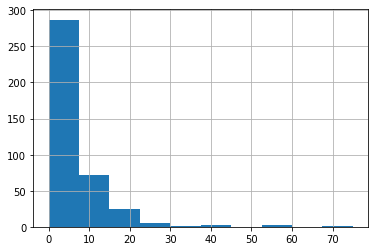

In [13]:
df_new['absences'].hist()

In [14]:
print("Min absences: ",np.min(df['absences']),"\nMax absences: " ,np.max(df['absences']))

lab= ["0-10","11-20", "21-30", "31-40", "+40"]

df_new['absences'] = pd.cut(x=df_new['absences'], 
                            bins=[np.min(df_new['absences']),10,20,30,40,np.max(df_new['absences'])], 
                            labels=lab,
                            include_lowest=True)

Min absences:  0 
Max absences:  75


In [ ]:
print("Min failures: ",np.min(df['failures']),"\nMax failures: " ,np.max(df['failures']))


## DATASET after preprocessing

In [30]:
df_new.head(-10)

sex    age Pstatus  Medu  Fedu  traveltime  studytime  failures schoolsup  \
0     F  18-19       A     4     4           2          2         0       yes   
1     F  15-17       T     1     1           1          2         0        no   
2     F  15-17       T     1     1           1          2         3       yes   
3     F  15-17       T     4     2           1          3         0        no   
4     F  15-17       T     3     3           1          2         0        no   
..   ..    ...     ...   ...   ...         ...        ...       ...       ...   
380   M  18-19       T     4     4           1          2         0        no   
381   M  18-19       T     2     1           2          1         0        no   
382   M  15-17       T     2     3           2          2         0        no   
383   M  18-19       T     1     1           2          1         1        no   
384   M  18-19       T     4     2           2          1         1        no   

    famsup paid  famrel  freetime  Dalc  health absences  \
0       no   no       4         3     1       3     0-10   
1      yes   no       5         3     1       3     0-10   
2       no  yes       4         3     2       3     0-10   
3      yes  yes       3         2     1       5     0-10   
4      yes  yes       4         3     1       5     0-10   
..     ...  ...     ...       ...   ...     ...      ...   
380     no  yes       3         2     1       2     0-10   
381     no   no       4         4     1       5     0-10   
382     no   no       4         4     1       3     0-10   
383     no   no       4         3     1       5     0-10   
384     no  yes       5         4     4       3    11-20   

                          G3  
0                 Mau (Poor)  
1                 Mau (Poor)  
2    Suficiente (Sufficient)  
3                 Bom (Good)  
4    Suficiente (Sufficient)  
..                       ...  
380               Bom (Good)  
381         Mediocre (Poor )  
382  Suficiente (Sufficient)  
383               Mau (Poor)  
384               Mau (Poor)  

[385 rows x 17 columns]

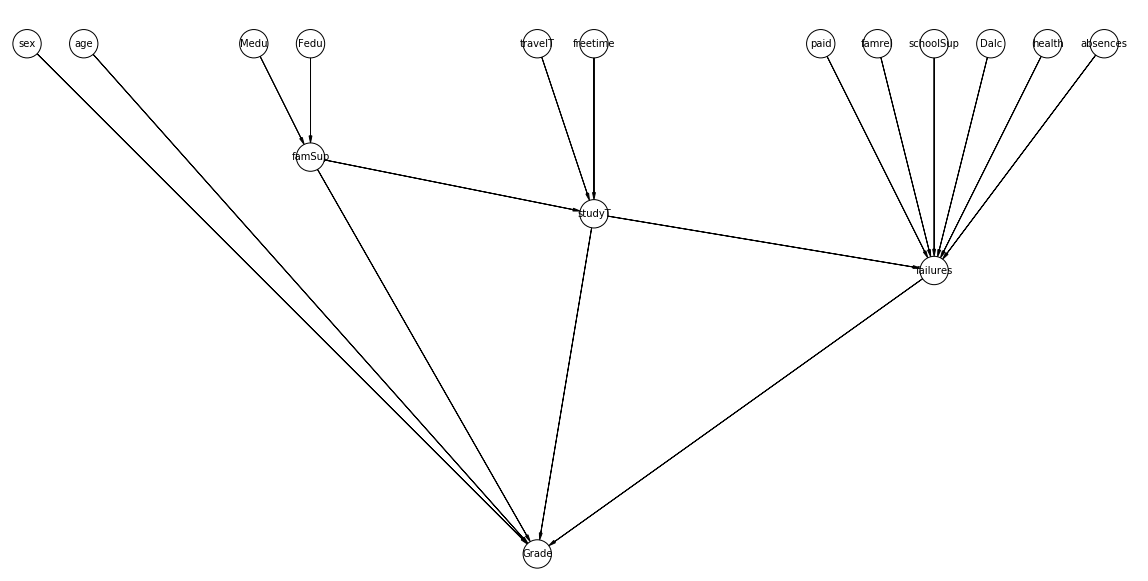

In [3]:
pgm = PGM(shape=[20, 10])   #creo la matrice di posizionamento dei nodi di dimensione 20x10

pgm.add_node(daft.Node('sex', r"sex", 1, 10))   #'sex' è il testo che verrà mostrato, r"sex" è l'identificativo, (1,10) sono le coordinate del nodo all'interno della matrice 20x10. 

#N.B. l'origine sta in basso a sinistra.

pgm.add_node(daft.Node('age', r"age", 2, 10))
#pgm.add_node(daft.Node('address', r"address", 9, 10))
#pgm.add_node(daft.Node('Pstatus', r"Pstatus", 4, 10))
pgm.add_node(daft.Node('Medu', r"Medu", 5, 10))
pgm.add_node(daft.Node('Fedu', r"Fedu", 6, 10))
#pgm.add_node(daft.Node('Mjob', r"Mjob", 7, 10))
#pgm.add_node(daft.Node('Fjob', r"Fjob", 8, 10))
#pgm.add_node(daft.Node('reason', r"reason", 3, 10))
pgm.add_node(daft.Node('travelT', r"travelT", 10, 10))
pgm.add_node(daft.Node('schoolSup', r"schoolSup", 17, 10))
pgm.add_node(daft.Node('paid', r"paid", 15, 10))
#pgm.add_node(daft.Node('activities', r"activities", 13, 10))
#pgm.add_node(daft.Node('higher', r"higher", 14, 10))
#pgm.add_node(daft.Node('internet', r"internet", 12, 10))
pgm.add_node(daft.Node('famrel', r"famrel", 16, 10))
pgm.add_node(daft.Node('freetime', r"freetime", 11, 10))
pgm.add_node(daft.Node('Dalc', r"Dalc", 18, 10))
pgm.add_node(daft.Node('health', r"health", 19, 10))
pgm.add_node(daft.Node('absences', r"absences", 20, 10))

pgm.add_node(daft.Node('famSup', r"famSup", 6, 8))
pgm.add_node(daft.Node('studyT', r"studyT", 11, 7))
pgm.add_node(daft.Node('failures', r"failures", 17, 6))


pgm.add_node(daft.Node('Grade', r"Grade", 10, 1))


#ora invece aggiungo le frecce:

pgm.add_edge('Medu', 'famSup')   #prende l'identificativo del nodo 1 e del nodo 2 e inserisce una freccia da nodo 1 a 2
pgm.add_edge('Fedu', 'famSup')
#pgm.add_edge('Mjob', 'famSup')
#pgm.add_edge('Fjob', 'famSup')
#pgm.add_edge('Pstatus', 'famSup')




pgm.add_edge('travelT', 'studyT')
pgm.add_edge('famSup', 'studyT')
#pgm.add_edge('activities', 'studyT')
#pgm.add_edge('internet', 'studyT')
pgm.add_edge('freetime', 'studyT')
#pgm.add_edge('address', 'studyT')


pgm.add_edge('studyT', 'failures')
pgm.add_edge('schoolSup', 'failures')
pgm.add_edge('paid', 'failures')
#pgm.add_edge('higher', 'failures')
pgm.add_edge('famrel', 'failures')
pgm.add_edge('Dalc', 'failures')
pgm.add_edge('absences', 'failures')
pgm.add_edge('health', 'failures')


pgm.add_edge('sex', 'Grade')
pgm.add_edge('famSup', 'Grade')
pgm.add_edge('studyT', 'Grade')
pgm.add_edge('failures', 'Grade')
pgm.add_edge('age', 'Grade')
#pgm.add_edge('reason', 'Grade')



pgm.render()
plt.show()

In [18]:
df_new.columns

Index(['sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'famrel', 'freetime', 'Dalc',
       'health', 'absences', 'G3'],
      dtype='object')

## Network

A graphical preliminary overview of the network:

- sex  
- age  
- address      
- famsize 
- Pstatus 
- Medu 
- Fedu    
- Mjob     
- Fjob     
- reason     
- guardian      
- traveltime     
- studytime   
- failures     
- schoolsup
- famsup
- paid    
- activities     
- nursery    
- higher   
- internet	               
- famrel        
- freetime                
- Dalc              
- health        
- absences



In [19]:
model = BayesianNetwork([('sex','G3'),   #sex ---> G3
                         ('age','G3'),
                         #('reason','G3'),
                         ('health','G3'),
                         ('famsup','G3'),
                         ('studytime','G3'),
                         ('failures','G3'),
                         
                         #('Pstatus','famsup'),
                         ('Medu','famsup'),
                         ('Fedu','famsup'),
                         #('Mjob','famsup'),
                         #('Fjob','famsup'),
                         
                         ('famsup','studytime'),
                         #('address','studytime'),
                         ('traveltime','studytime'),
                         ('freetime','studytime'),
                         #('internet','studytime'),
                         #('activities','studytime'),
                         
                         #('higher','failures'),
                         ('paid','failures'),
                         ('famrel','failures'),
                         ('schoolsup','failures'),
                         #('internet','failures'),
                         #('activities','failures'),
                         ('Dalc','failures'),
                         ('absences','failures')])

In [20]:
model.nodes()  #printa tutti i nodi

NodeView(('sex', 'G3', 'age', 'health', 'famsup', 'studytime', 'failures', 'Medu', 'Fedu', 'traveltime', 'freetime', 'paid', 'famrel', 'schoolsup', 'Dalc', 'absences'))

In [22]:
model.cpds = [] #inizializzo l'array che contiene le tabular (vedere meglio)

model.fit(data=df_new,                          #usa il dataframe per allenare il modello
          estimator=BayesianEstimator, 
          prior_type="BDeu")

for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

CPT of sex:
+--------+---------+
| sex(F) | 0.52625 |
+--------+---------+
| sex(M) | 0.47375 |
+--------+---------+ 

CPT of G3:
+-----+---------------------+---------------------+
| ... | age(20-22 )         | age(20-22 )         |
+-----+---------------------+---------------------+
| ... | failures(3)         | failures(3)         |
+-----+---------------------+---------------------+
| ... | famsup(yes)         | famsup(yes)         |
+-----+---------------------+---------------------+
| ... | health(5)           | health(5)           |
+-----+---------------------+---------------------+
| ... | sex(M)              | sex(M)              |
+-----+---------------------+---------------------+
| ... | studytime(3)        | studytime(4)        |
+-----+---------------------+---------------------+
| ... | 0.14285714285714285 | 0.14285714285714285 |
+-----+---------------------+---------------------+
| ... | 0.14285714285714285 | 0.14285714285714285 |
+-----+---------------------+---------

In [23]:
# Checking the validity of the model 
# This method checks if the sum of the probabilities for each state is equal to 1 (tol=0.01) and if the CPDs associated with nodes are consistent with their parents.
model.check_model()   #per essere sicuri 

True

In [24]:
#Cardinality of all model nodes
model.get_cardinality()

defaultdict(int,
            {'sex': 2,
             'G3': 7,
             'age': 3,
             'health': 5,
             'famsup': 2,
             'studytime': 4,
             'failures': 4,
             'Medu': 5,
             'Fedu': 5,
             'traveltime': 4,
             'freetime': 5,
             'paid': 2,
             'famrel': 5,
             'schoolsup': 2,
             'Dalc': 5,
             'absences': 5})

### Exact Inference

Exact Inference in pgmpy is implemented through the Variable Elimination Method and Belief Propagation rather than with simple enumeration; being one of the purpouses of this work exploring topics seen in class, the former is choosen.

Causal inference analyzes the response of an effect variable when a cause of the effect variable is changed.

In [25]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)  #

In [26]:
print(infer.query(["G3"],evidence={"sex": 'M',"age": '18-19'})) 

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

+------------------------------------------------------------------------------+-----------+
| G3                                                                           |   phi(G3) |
+==============================================================================+===========+
| G3(Bom (Good))                                                               |    0.1975 |
+------------------------------------------------------------------------------+-----------+
| G3(Excelente (Excellent))                                                    |    0.0565 |
+------------------------------------------------------------------------------+-----------+
| G3(Mau (Poor))                                                               |    0.0807 |
+------------------------------------------------------------------------------+-----------+
| G3(Mediocre (Poor ))                                                         |    0.2007 |
+---------------------------------------------------------------------

In [27]:
print(infer.query(["G3"],evidence={"sex": 'F',"age": '18-19'})) 

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

+------------------------------------------------------------------------------+-----------+
| G3                                                                           |   phi(G3) |
+==============================================================================+===========+
| G3(Bom (Good))                                                               |    0.0906 |
+------------------------------------------------------------------------------+-----------+
| G3(Excelente (Excellent))                                                    |    0.0802 |
+------------------------------------------------------------------------------+-----------+
| G3(Mau (Poor))                                                               |    0.2087 |
+------------------------------------------------------------------------------+-----------+
| G3(Mediocre (Poor ))                                                         |    0.1912 |
+---------------------------------------------------------------------

In [37]:
print(infer.query(["G3"],evidence={"Medu": 4,"Fedu": 4})) 

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

+------------------------------------------------------------------------------+-----------+
| G3                                                                           |   phi(G3) |
+==============================================================================+===========+
| G3(Bom (Good))                                                               |    0.1529 |
+------------------------------------------------------------------------------+-----------+
| G3(Excelente (Excellent))                                                    |    0.0716 |
+------------------------------------------------------------------------------+-----------+
| G3(Mau (Poor))                                                               |    0.1367 |
+------------------------------------------------------------------------------+-----------+
| G3(Mediocre (Poor ))                                                         |    0.1523 |
+---------------------------------------------------------------------

In [38]:
print(infer.query(["G3"],evidence={"Medu": 1,"Fedu": 1})) 

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

+------------------------------------------------------------------------------+-----------+
| G3                                                                           |   phi(G3) |
+==============================================================================+===========+
| G3(Bom (Good))                                                               |    0.1670 |
+------------------------------------------------------------------------------+-----------+
| G3(Excelente (Excellent))                                                    |    0.0729 |
+------------------------------------------------------------------------------+-----------+
| G3(Mau (Poor))                                                               |    0.1259 |
+------------------------------------------------------------------------------+-----------+
| G3(Mediocre (Poor ))                                                         |    0.1506 |
+---------------------------------------------------------------------

In [40]:
lab5= ["Mau (Poor)","Mediocre (Poor )", "Suficiente (Sufficient)","Bom (Good)","Muito Bom (Very Good)","Excelente (Excellent)","Muito bom con distincao e louvor (Very good with distinction and honors)"]


In [41]:
print(infer.query(["Dalc"],evidence={"G3": lab5[6], "sex": 'M'})) 

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

+---------+-------------+
| Dalc    |   phi(Dalc) |
+=========+=============+
| Dalc(1) |      0.6142 |
+---------+-------------+
| Dalc(2) |      0.2281 |
+---------+-------------+
| Dalc(3) |      0.0828 |
+---------+-------------+
| Dalc(4) |      0.0409 |
+---------+-------------+
| Dalc(5) |      0.0340 |
+---------+-------------+


In [43]:
print(infer.query(["Dalc"],evidence={"G3": lab5[6], "sex": 'F'})) 

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

+---------+-------------+
| Dalc    |   phi(Dalc) |
+=========+=============+
| Dalc(1) |      0.6311 |
+---------+-------------+
| Dalc(2) |      0.2190 |
+---------+-------------+
| Dalc(3) |      0.0806 |
+---------+-------------+
| Dalc(4) |      0.0376 |
+---------+-------------+
| Dalc(5) |      0.0316 |
+---------+-------------+


is it important the family support for the student graduation?

In [47]:
print(infer.query(["freetime"],evidence={"G3" : 'Suficiente (Sufficient)', "failures" : 0}))

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-------------+-----------------+
| freetime    |   phi(freetime) |
+=============+=================+
| freetime(1) |          0.0484 |
+-------------+-----------------+
| freetime(2) |          0.1583 |
+-------------+-----------------+
| freetime(3) |          0.3984 |
+-------------+-----------------+
| freetime(4) |          0.2919 |
+-------------+-----------------+
| freetime(5) |          0.1030 |
+-------------+-----------------+


Quanta probabilità ha uno studente nella fascia d'etaà media (18-19 anni), considerando che dedica mediamente dalle 5 alle 10 ore di studio, in ottimo stato di salute sia o meno rimandato.

In [54]:
print(infer.query(["failures"],evidence={"age" : '18-19' , "studytime" : 3, "health" : 5}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-------------+-----------------+
| failures    |   phi(failures) |
+=============+=================+
| failures(0) |          0.7473 |
+-------------+-----------------+
| failures(1) |          0.1406 |
+-------------+-----------------+
| failures(2) |          0.0543 |
+-------------+-----------------+
| failures(3) |          0.0579 |
+-------------+-----------------+


In [ ]:
print(infer.query(["failures"],evidence={"age" : '18-19' , "studytime" : 3, "health" : 5}))

In [2]:
print("Speriamo funzioniii")

Speriamo funzioniii


In [1]:
print("ci siamo quasi")

ci siamo quasi


PAPER:
- https://degree.lamar.edu/articles/undergraduate/parents-education-level-and-childrens-success/
- https://www.brookings.edu/blog/up-front/2021/01/12/the-unreported-gender-gap-in-high-school-graduation-rates/
- https://hbr.org/2018/06/how-working-parents-can-manage-the-demands-of-school-age-kids
- https://www.scholaro.com/db/Countries/Portugal/Grading-System  
- 
- 
- 